In [1]:
import cv2
import os
import sys
import matplotlib.pyplot as plt
sys.path.append("../")

from data.keypoint_dataset import KeypointDatasetJSON

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
clip_folder = "/auto/plzen4-ntis/projects/korpusy_cv/JSALT/YouTubeASL_v2/data/train/clips_cropped"
raw_clip_folder = "/auto/plzen4-ntis/projects/korpusy_cv/JSALT/YouTubeASL_v2/data/train/raw_videos"

normalization = (
    "global-pose_landmarks",
    "local-right_hand_landmarks",
    "local-left_hand_landmarks",
    "local-face_landmarks",
)

In [3]:
def load_video(path: str):
    video = []

    cap = cv2.VideoCapture(path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    ret = True
    while ret:
        ret, img = cap.read()
        if ret:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            video.append(img)
    cap.release()
    return video, fps

def plot_keypoints(data, path, num_frames=10):
    clip_keypoints = data["data"]
    clip_name = data["clip_name"]
    
    clip_path = os.path.join(path, f"{clip_name}.mp4")
    video, fps = load_video(clip_path)
    
    fig, ax = plt.subplots(1, num_frames, figsize=(num_frames*4, 4))
    for fidx in range(num_frames):
        frame_keypoints = clip_keypoints[fidx]
        kpx = frame_keypoints[::2]
        kpy = frame_keypoints[1::2]
        
        ax[fidx].imshow(video[fidx])
        ax[fidx].scatter(kpx, kpy, s=2)
    plt.show()

In [4]:
# prepare mapping between clip names and video names

clip_to_video = {}
clip_names = os.listdir(clip_folder)
clip_names = [file for file in clip_names if file.endswith(".mp4")]
for idx in range(len(clip_names)):
    name_split = clip_names[idx].split(".")[:-1]
    clip_names[idx] = ".".join(name_split)
for name in clip_names:
    name_split = name.split(".")[:-1]
    video_name = ".".join(name_split)
    clip_to_video[name] = video_name

In [5]:
# create dataset

# keypoints in original video without cropping and normalization
dataset_keypoints = KeypointDatasetJSON(
    clip_folder,
    clip_to_video,
    kp_normalization=(),
    data_key="keypoints"
)

# keypoints in cropped video without normalization
dataset_cropped_keypoints = KeypointDatasetJSON(
    clip_folder,
    clip_to_video,
    kp_normalization=(),
    data_key="cropped_keypoints"
)

# keypoints in cropped video with normalization
dataset_normalized = KeypointDatasetJSON(
    clip_folder,
    clip_to_video,
    kp_normalization=normalization,
    data_key="cropped_keypoints"
)

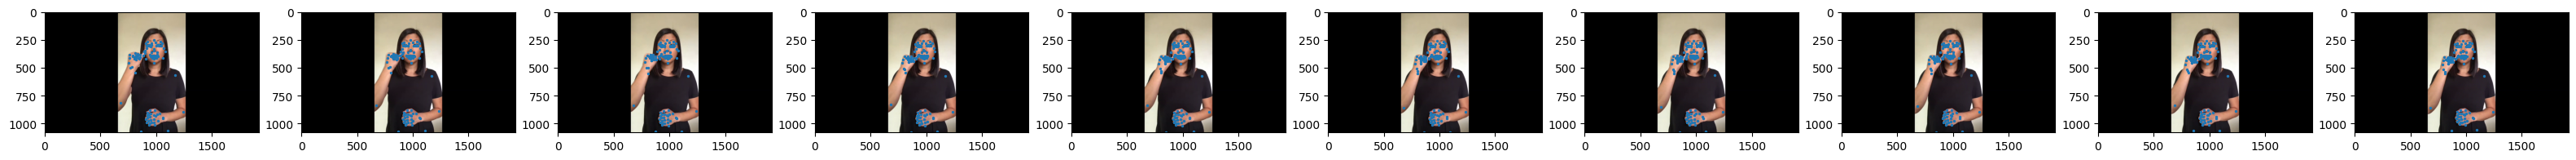

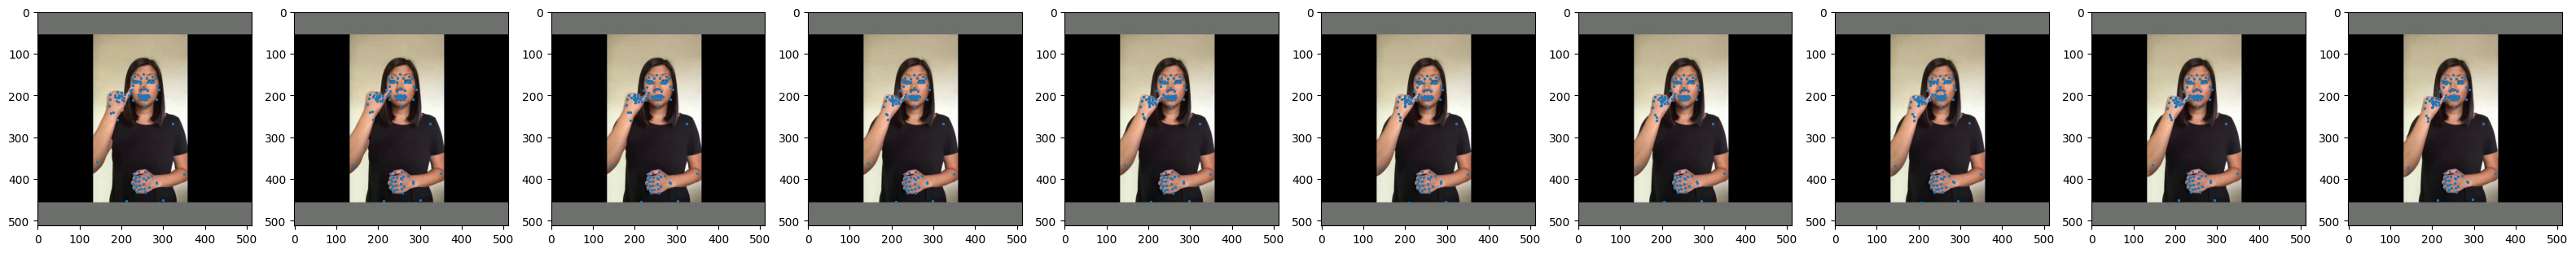

In [6]:
clip_data = dataset_keypoints[0][0]
plot_keypoints(clip_data, raw_clip_folder, num_frames=10)

clip_data = dataset_cropped_keypoints[0][0]
plot_keypoints(clip_data, clip_folder, num_frames=10)

In [40]:
dataset_normalized[0]

[{'data': array([[ 0.02655677, -0.30694449,  0.06518628, ..., -0.33696234,
           0.30600212, -0.35921457],
         [ 0.02518398, -0.30605474,  0.06431278, ..., -0.3358517 ,
           0.30573449, -0.35874513],
         [ 0.02049237, -0.30980097,  0.0694783 , ..., -0.32919485,
           0.31124345, -0.35079785],
         ...,
         [-0.03736988, -0.26936863,  0.00695979, ..., -0.34264636,
           0.27123074, -0.35000879],
         [-0.02698183, -0.27449578,  0.01391255, ..., -0.34203925,
           0.27056533, -0.3502019 ],
         [-0.01551106, -0.24316529,  0.03045345, ..., -0.33920362,
           0.27131404, -0.34877031]]),
  'video_name': 'nDAwnLHqyHM',
  'clip_name': 'nDAwnLHqyHM.000182-000424'}]